In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

from nanonets.utils import fft, harmonic_strength, total_harmonic_distortion, BLUE_COLOR

plt.style.use(["science","bright","grid"])
PATH = "/home/jonasmensing/bagheera/data/2_funding_period/dynamic/AC/amp_freq/"
# PATH = "/home/j/j_mens07/bagheera/data/2_funding_period/dynamic/AC/amp_freq/"

In [14]:
AMPLITUDE_LIST  = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]
FREQ_LIST_MHZ   = [0.005,0.01,0.03,0.06,0.12,0.25,0.5,1.,2.,5.,6.,8.,10.,12.,15.,18.,23.,28.,36.,44.,55.,68.,86.,105.,133.,266.,610.,1200.,2400.]
N_PERIODS       = 100
SAMPLE_P_PERIOD = 40

### Electric Current

In [ ]:
# e_type  = 'constant'
# dts     = {freq : 1/(40 * freq * 1e6) for freq in FREQ_LIST_MHZ}
# N_steps = {freq : int(np.ceil((N_PERIODS / (freq * 1e6)) / dts[freq])) for freq in FREQ_LIST_MHZ}
# time    = {freq : dts[freq]*np.arange(N_steps[freq]) for freq in FREQ_LIST_MHZ}
# data    = {amp : {freq : pd.read_csv(f"{PATH}Nx=9_Ny=9_Ne=8_{freq:.3f}_{amp:.3f}_{e_type}.csv") for freq in FREQ_LIST_MHZ} for amp in AMPLITUDE_LIST}

### Single Signal

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2033/1085242578.py:15: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_xlabel("$t$ [$\mu$s]", fontsize='large')
/tmp/ipykernel_2033/1085242578.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_xlabel("$t$ [$\mu$s]")


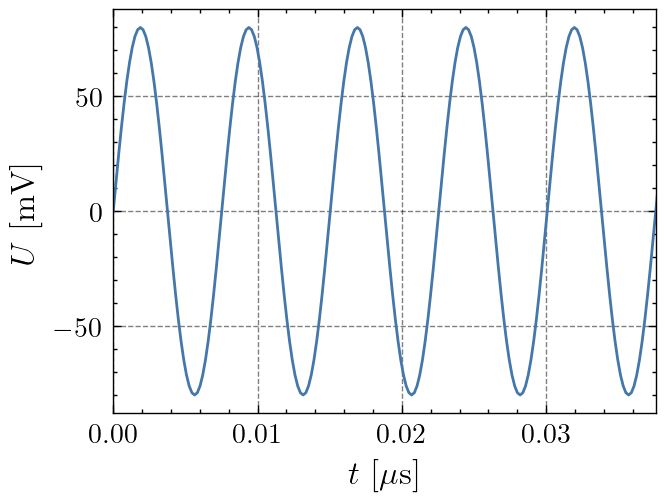

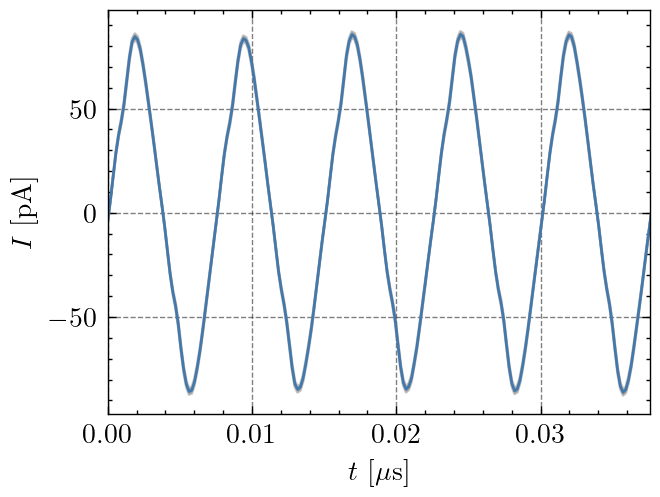

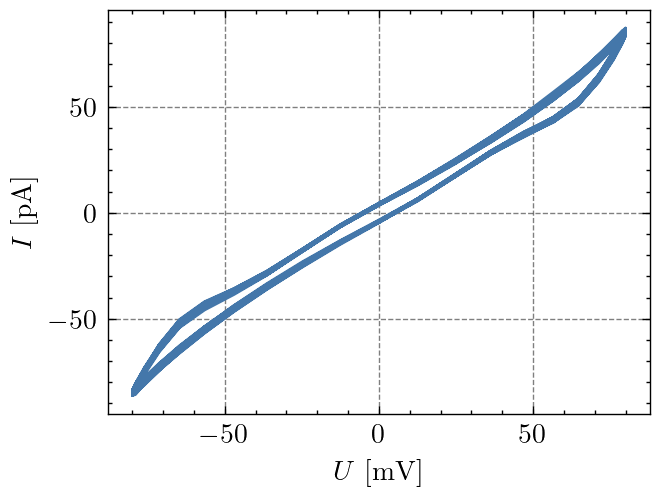

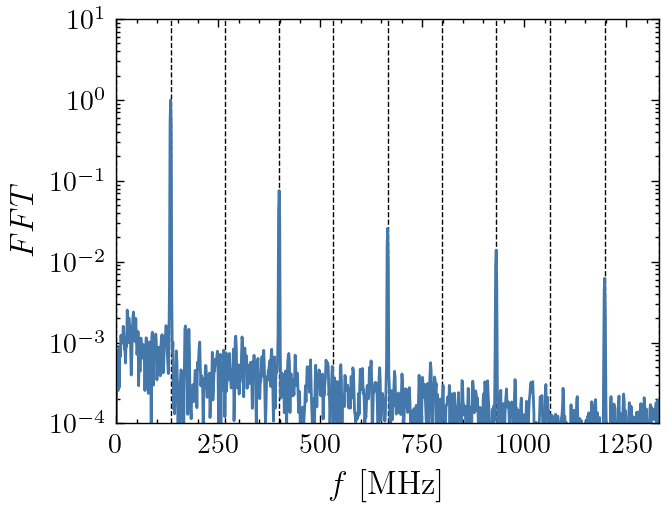

In [30]:
freq    = 133.0
amp     = 0.08
n_sk    = 5
n_p     = 5
t       = time[freq][:-1][:-n_sk*SAMPLE_P_PERIOD]*1e6
dt      = dts[freq]
x       = data[amp][freq]['E0'].values[n_sk*SAMPLE_P_PERIOD:]*1000
y       = data[amp][freq]['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
y_e     = data[amp][freq]['Error'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
xf, yf  = fft(y, dt=dt, use_hann=True)

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot()
ax1.plot(t, x)
ax1.set_xlabel("$t$ [$\mu$s]", fontsize='large')
ax1.set_ylabel("$U$ [mV]", fontsize='large')
ax1.set_xlim(0, t[n_p*SAMPLE_P_PERIOD])

fig.savefig(f"plots/amp_freq/{e_type}_input_{freq:.3f}_{amp:.3f}.svg", transparent=True)

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot()
ax1.plot(t, y)
ax1.fill_between(t, y-y_e, y+y_e, alpha=0.5, color='grey')
ax1.set_xlabel("$t$ [$\mu$s]")
ax1.set_ylabel("$I$ [pA]")
ax1.set_xlim(0, t[n_p*SAMPLE_P_PERIOD])
fig.savefig(f"plots/amp_freq/{e_type}_output_{freq:.3f}_{amp:.3f}.svg", transparent=True)

fig = plt.figure(dpi=200)
ax1 = fig.add_subplot()
ax1.plot(x, y)
ax1.set_xlabel("$U$ [mV]")
ax1.set_ylabel("$I$ [pA]")

fig.savefig(f"plots/amp_freq/{e_type}_phase_{freq:.3f}_{amp:.3f}.svg", transparent=True)

fig, ax = plt.subplots(dpi=200)
for i in range(16):
    ax.vlines(i*freq, 1e-4, 1e1, color='black', ls='--', lw=.5)

ax.plot(xf*1e-6, yf/np.max(yf))
ax.set_yscale('log')
ax.set_xlim(0.0, 10*freq)
ax.set_ylim(1e-4, 1e1)
ax.set_xlabel("$f$ [MHz]", fontsize='large')
ax.set_ylabel("$FFT$", fontsize='large')
ax.grid(False)

fig.savefig(f"plots/amp_freq/{e_type}_fft_{freq:.3f}_{amp:.3f}.svg", transparent=True)

### Parameter Space

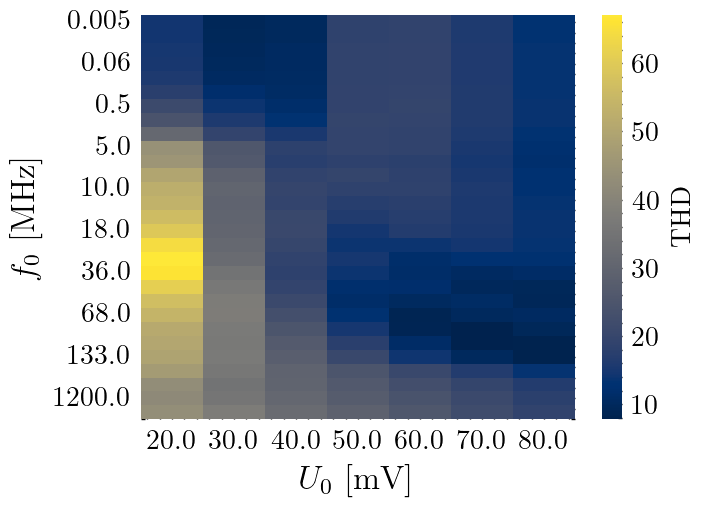

In [35]:
thd_arr = pd.DataFrame([[total_harmonic_distortion(signal=data[amp][freq]['Observable'].values, f0=freq*1e6, dt=dts[freq], N_f=18) 
                         for amp in AMPLITUDE_LIST[1:]] for freq in FREQ_LIST_MHZ], columns=np.array(AMPLITUDE_LIST[1:])*1000, index=FREQ_LIST_MHZ)
fig, ax = plt.subplots(dpi=200)
ax      = sns.heatmap(thd_arr, cmap='cividis', ax=ax, cbar_kws={'label':'THD'}, annot=False)
_       = plt.yticks(rotation=0)
_       = ax.set_ylabel("$f_0$ [MHz]", fontsize='large')
_       = ax.set_xlabel("$U_0$ [mV]", fontsize='large')

fig.savefig(f"plots/amp_freq/{e_type}_thd_map.svg", transparent=True)

In [44]:
amp = 0.02
areas = []
for freq in FREQ_LIST_MHZ:
    t = time[freq][:-1][:-n_sk*SAMPLE_P_PERIOD]*1e6
    x = data[amp][freq]['E0'].values[n_sk*SAMPLE_P_PERIOD:]*1000
    y = data[amp][freq]['Observable'].values[n_sk*SAMPLE_P_PERIOD:]*1e-6
    dVdt    = np.gradient(x, t)
    engergy = np.trapz(y, x) 
    areas.append(engergy)

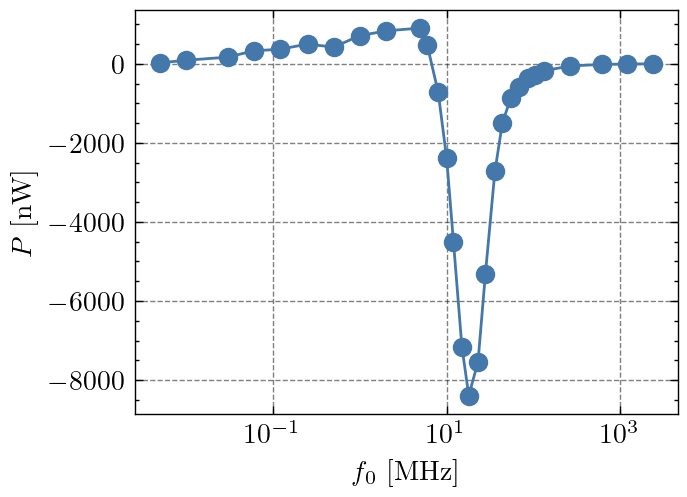

In [ ]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax.plot(FREQ_LIST_MHZ, areas, 'o-')
ax.set_xlabel("$f_0$ [MHz]")
ax.set_ylabel("$P$ [nW]")
ax.set_xscale("log")

In [42]:
FREQ_LIST_MHZ

[0.005,
 0.01,
 0.03,
 0.06,
 0.12,
 0.25,
 0.5,
 1.0,
 2.0,
 5.0,
 6.0,
 8.0,
 10.0,
 12.0,
 15.0,
 18.0,
 23.0,
 28.0,
 36.0,
 44.0,
 55.0,
 68.0,
 86.0,
 105.0,
 133.0,
 266.0,
 610.0,
 1200.0,
 2400.0]

In [45]:
areas

[23.562401685375526,
 89.99855891947396,
 167.33812991748508,
 328.3870966420918,
 367.6385454759076,
 498.6816039279676,
 421.3095941476595,
 712.157454386175,
 831.8788937486916,
 904.8406763579947,
 465.96095906663106,
 -721.656158058681,
 -2376.5698497013495,
 -4506.703120017535,
 -7154.367355190307,
 -8391.624362219403,
 -7544.738334495738,
 -5315.386575290326,
 -2721.7061067647364,
 -1488.0955239752482,
 -864.0514152430703,
 -589.6714267731169,
 -361.9972350687044,
 -274.8726710986146,
 -176.08618191946854,
 -53.761263407246574,
 -16.691721655314584,
 -5.625808420124429,
 -1.4571646440046986]

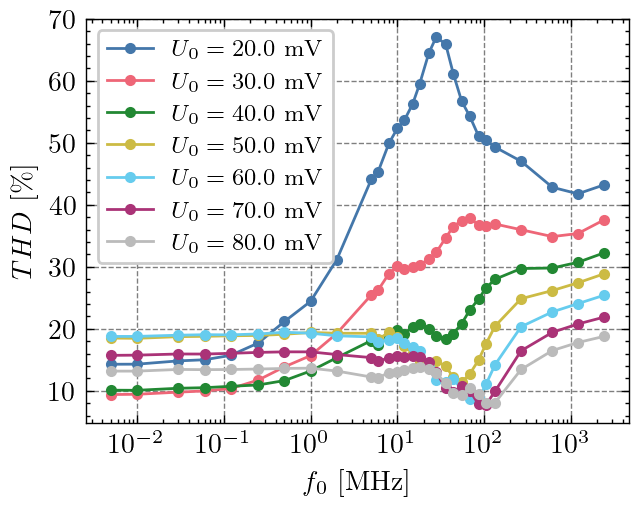

In [21]:
fig, ax = plt.subplots(dpi=200)
for amp in AMPLITUDE_LIST[1:]:
    ax.plot(thd_arr[amp*1000], '.-', label=f'$U_0 = {amp*1000}$ mV')
ax.set_xlabel("$f_0$ [MHz]")
ax.set_ylabel("$THD$ [\%]")
ax.set_xscale("log")
ax.legend(fontsize='small')

# fig.savefig(f"plots/amp_freq/{e_type}_thd_vs_freq.svg", transparent=True)

In [32]:
states = {amp : {freq : pd.read_csv(f"{PATH}mean_state_Nx=9_Ny=9_Ne=8_{freq:.3f}_{amp:.3f}_{e_type}.csv") for freq in FREQ_LIST_MHZ} for amp in AMPLITUDE_LIST}

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [12]:
thd_net = {amp : pd.DataFrame([[total_harmonic_distortion(states[amp][freq].iloc[:,(8+i)].values, freq*1e6, dts[freq], N_f=18) for i in range(81)]
                  for freq in FREQ_LIST_MHZ], index=FREQ_LIST_MHZ).T for amp in AMPLITUDE_LIST[1:]}

/tmp/ipykernel_7265/756530536.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=f"$U_0 = {amp*1000}$ mV", loc='upper right')


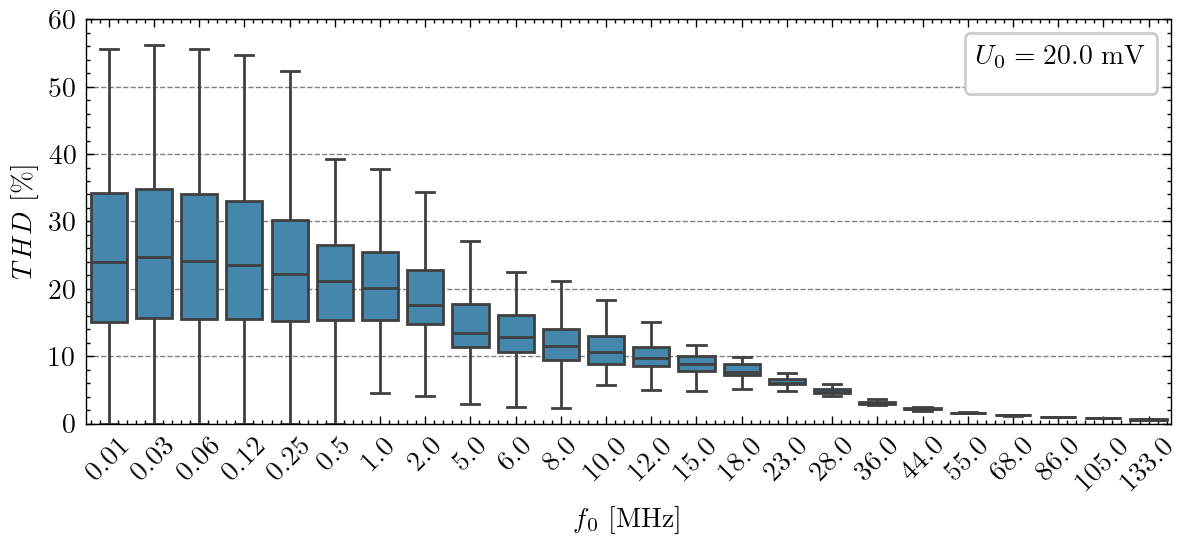

In [13]:
amp     = 0.02
fig, ax = plt.subplots(dpi=200)
fig.set_figwidth(fig.get_figwidth()*2)
ax  = sns.boxplot(data=thd_net[amp], color=BLUE_COLOR, fliersize=0)
_   = ax.set_ylim(0,60)
_   = ax.set_xlabel("$f_0$ [MHz]")
_   = ax.set_ylabel("$THD$ [\%]")
_   = plt.xticks(rotation=45)
ax.legend(title=f"$U_0 = {amp*1000}$ mV", loc='upper right')

fig.savefig(f"plots/amp_freq/{e_type}_net_thd_vs_freq.svg", transparent=True)

### Voltage

In [44]:
AMPLITUDE_LIST  = [0.01]#,0.02,0.03,0.04,0.05,0.06,0.07,0.08]
FREQ_LIST_MHZ   = [0.002,0.005,0.01,0.03,0.06,0.12,0.25,0.5,1.,2.,5.,6.,8.,10.,12.,15.,18.,23.,28.,36.,44.,55.,68.,86.,105.,133.,266.,610.,1200.,2400.]

e_type  = 'floating'
dts     = {freq : 1/(40 * freq * 1e6) for freq in FREQ_LIST_MHZ}
N_steps = {freq : int(np.ceil((N_PERIODS / (freq * 1e6)) / dts[freq])) for freq in FREQ_LIST_MHZ}
time    = {freq : dts[freq]*np.arange(N_steps[freq]) for freq in FREQ_LIST_MHZ}
data    = {amp : {freq : pd.read_csv(f"{PATH}Nx=9_Ny=9_Ne=8_{freq:.3f}_{amp:.3f}_{e_type}.csv") for freq in FREQ_LIST_MHZ} for amp in AMPLITUDE_LIST}

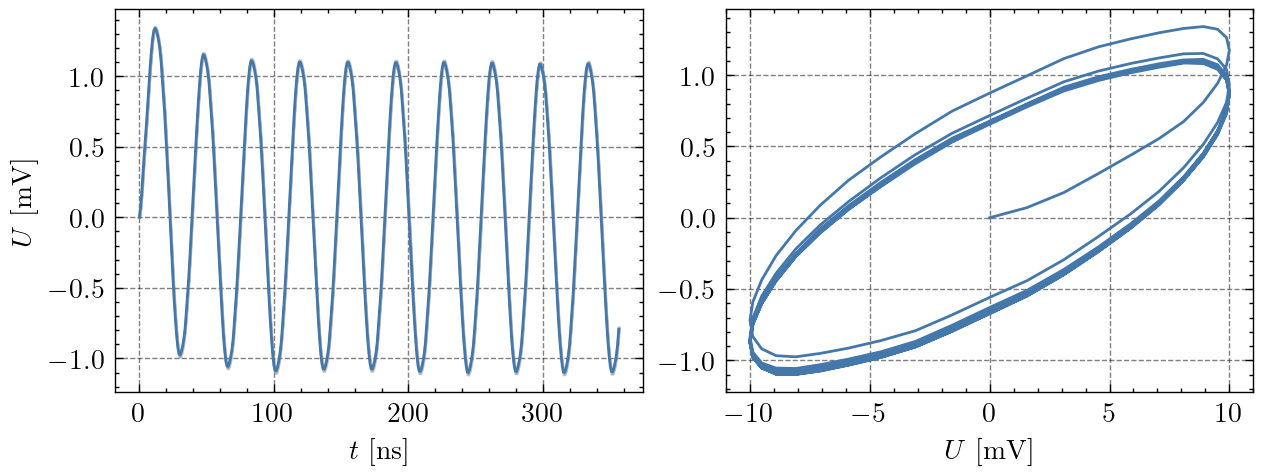

In [45]:
freq = 28.0	
amp  = 0.01
n_p  = 4
t    = time[freq][:-1]*1e9
x    = data[amp][freq]['E0'].values*1000
y    = data[amp][freq]['Observable'].values*1000
y_e  = data[amp][freq]['Error'].values*1000

fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.8)
fig.set_figheight(fig.get_figheight()*0.9)
ax1 = fig.add_subplot(1,2,1)
ax1.plot(t[:n_p*N_PERIODS], y[:n_p*N_PERIODS])
ax1.fill_between(t[:n_p*N_PERIODS], y[:n_p*N_PERIODS]-y_e[:n_p*N_PERIODS], y[:n_p*N_PERIODS]+y_e[:n_p*N_PERIODS], alpha=0.5, color='grey')
ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$U$ [mV]")
ax1 = fig.add_subplot(1,2,2)
ax1.plot(x[:n_p*N_PERIODS], y[:n_p*N_PERIODS])
ax1.set_xlabel("$U$ [mV]")
fig.savefig(f"plots/amp_freq/{e_type}_signal_{freq:.3f}_{amp:.3f}.svg", transparent=True)

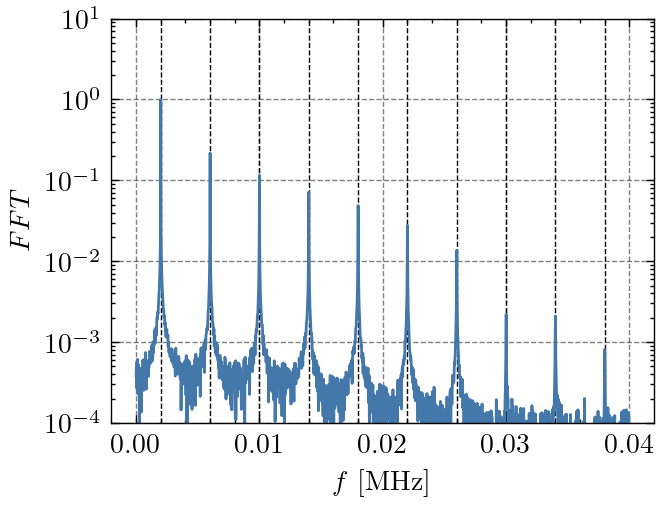

In [47]:
freq = 0.002
amp  = 0.01
n_p  = 4
dt   = dts[freq]
y    = data[amp][freq]['Observable'].values*1e-6

xf, yf  = fft(y[n_p*N_PERIODS:], dt=dt, n_padded=100)
fig, ax = plt.subplots(dpi=200)
for i in [1,3,5,7,9,11,13,15,17,19]:
    ax.vlines(i*freq, 1e-4, 1e1, color='black', ls='--', lw=.5)

ax.plot(xf*1e-6, yf/np.max(yf))
ax.set_yscale('log')
# ax.set_xlim(0.0,200)
ax.set_ylim(1e-4,1e1)
ax.set_xlabel("$f$ [MHz]")
ax.set_ylabel("$FFT$")
fig.savefig(f"plots/amp_freq/{e_type}_fft_{freq:.3f}_{amp:.3f}.svg", transparent=True)

Text(0.5, 12.31756469338072, '$U_0$ [mV]')

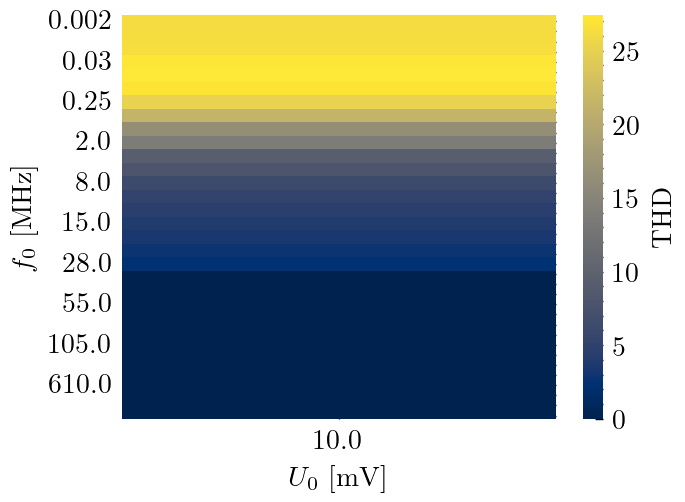

In [48]:
thd_arr = pd.DataFrame([[total_harmonic_distortion(signal=data[amp][freq]['Observable'].values, f0=freq*1e6, dt=dts[freq], N_f=18) 
                         for amp in AMPLITUDE_LIST] for freq in FREQ_LIST_MHZ], columns=np.array(AMPLITUDE_LIST)*1000, index=FREQ_LIST_MHZ)
fig, ax = plt.subplots(dpi=200)
ax      = sns.heatmap(thd_arr, cmap='cividis', ax=ax, cbar_kws={'label':'THD'})
_       = plt.yticks(rotation=0)
ax.set_ylabel("$f_0$ [MHz]")
ax.set_xlabel("$U_0$ [mV]")
# fig.savefig(f"plots/amp_freq/{e_type}_thd_map.svg", transparent=True)

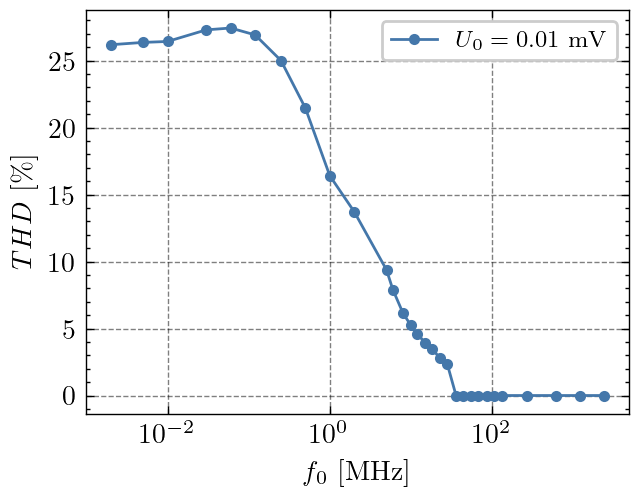

In [49]:
fig, ax = plt.subplots(dpi=200)
for amp in AMPLITUDE_LIST:
    ax.plot(thd_arr[amp*1000], '.-', label=f'$U_0 = {amp}$ mV')
ax.set_xlabel("$f_0$ [MHz]")
ax.set_ylabel("$THD$ [\%]")
ax.set_xscale("log")
ax.legend(fontsize='x-small')
fig.savefig(f"plots/amp_freq/{e_type}_thd_vs_freq.svg", transparent=True)

In [19]:
states = {amp : {freq : pd.read_csv(f"{PATH}mean_state_Nx=9_Ny=9_Ne=8_{freq:.3f}_{amp:.3f}_{e_type}.csv") for freq in FREQ_LIST_MHZ} for amp in AMPLITUDE_LIST}

In [20]:
thd_net = {amp : pd.DataFrame([[total_harmonic_distortion(states[amp][freq].iloc[:,(8+i)].values, freq*1e6, dts[freq], N_f=18) for i in range(81)]
                  for freq in FREQ_LIST_MHZ], index=FREQ_LIST_MHZ).T for amp in AMPLITUDE_LIST[1:]}

/tmp/ipykernel_7265/756530536.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=f"$U_0 = {amp*1000}$ mV", loc='upper right')


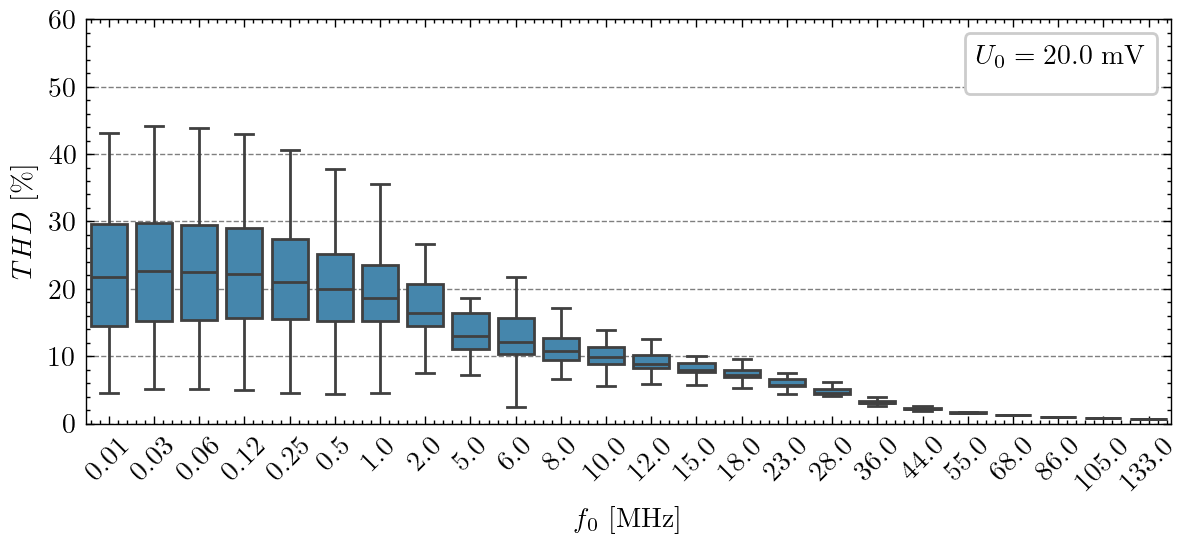

In [21]:
amp     = 0.02
fig, ax = plt.subplots(dpi=200)
fig.set_figwidth(fig.get_figwidth()*2)
ax  = sns.boxplot(data=thd_net[amp], color=BLUE_COLOR, fliersize=0)
_   = ax.set_ylim(0,60)
_   = ax.set_xlabel("$f_0$ [MHz]")
_   = ax.set_ylabel("$THD$ [\%]")
_   = plt.xticks(rotation=45)
ax.legend(title=f"$U_0 = {amp*1000}$ mV", loc='upper right')

fig.savefig(f"plots/amp_freq/{e_type}_net_thd_vs_freq.svg", transparent=True)